<a href="https://colab.research.google.com/github/viroangrawat/Stout---Digital-Data-Analytics-Internship/blob/main/casestudy%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
df = pd.read_csv('loans_full_schema.csv', index_col=0)

In [3]:
df.head()

,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [28]:
df['emp_length'].fillna((df['emp_length'].mean()), inplace=True)
df['annual_income_joint'] = df['annual_income_joint'].fillna(0)
df['debt_to_income_joint'] = df['debt_to_income_joint'].fillna(0)
df = df.drop(['emp_length', 'state', "verified_income", "debt_to_income", "annual_income_joint", "verification_income_joint", "debt_to_income_joint", "delinq_2y",
"months_since_last_delinq", "earliest_credit_line",
"inquiries_last_12m",
"total_credit_lines",
"open_credit_lines",
"total_credit_limit",
"total_credit_utilized",
"num_collections_last_12m",
"num_historical_failed_to_pay",
"months_since_90d_late",
"current_accounts_delinq",
"total_collection_amount_ever",
"current_installment_accounts",
"accounts_opened_24m",
"months_since_last_credit_inquiry",
"num_satisfactory_accounts",
"num_accounts_120d_past_due",
"num_accounts_30d_past_due",
"num_active_debit_accounts",
"total_debit_limit",
"num_total_cc_accounts",
"num_open_cc_accounts",
"num_cc_carrying_balance",
"num_mort_accounts",
"account_never_delinq_percent",
"tax_liens",
"grade",
"sub_grade",
"issue_month",
"loan_status",
"initial_listing_status",
"disbursement_method"], axis = 1)
df.head(10)

KeyError: ignored

In [29]:
df.head()

,homeownership,annual_income,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_title,,,,,,,,,,,,,,
global config engineer,MORTGAGE,90000.0,0,moving,individual,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0
warehouse office clerk,RENT,40000.0,1,debt_consolidation,individual,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0
assembly,RENT,40000.0,0,other,individual,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0
customer service,RENT,30000.0,0,debt_consolidation,individual,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0
security supervisor,RENT,35000.0,0,credit_card,joint,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0


In [43]:
df['balance'].fillna((df['balance'].mean()), inplace=True)
df = df.drop(["paid_late_fees"], axis = 1)

In [44]:
corr1 = df.corr()
print(corr1)

                        annual_income  ...  paid_interest
annual_income                1.000000  ...       0.174154
public_record_bankrupt      -0.030568  ...       0.000319
loan_amount                  0.324665  ...       0.721582
term                         0.044843  ...       0.471001
interest_rate               -0.099584  ...       0.514508
installment                  0.315693  ...       0.695590
balance                      0.280170  ...       0.716394
paid_total                   0.162005  ...       0.206750
paid_principal               0.141893  ...       0.077493
paid_interest                0.174154  ...       1.000000

[10 rows x 10 columns]


Figure(864x648)


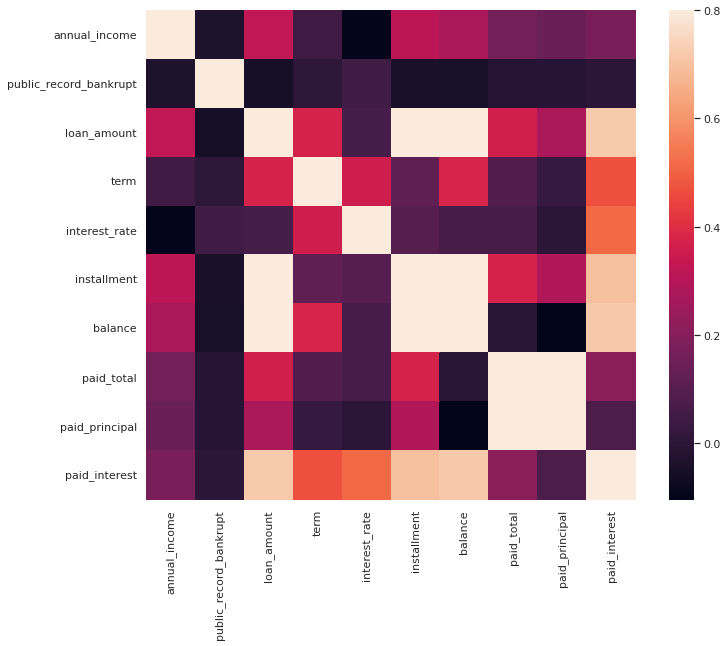

In [45]:
f, ax = plt.subplots(figsize = (12,9))
print((sns.heatmap(corr1, vmax = 0.8, square = True)).figure)

In [63]:
df = df.drop([ "public_record_bankrupt", "loan_purpose", "application_type", ], axis = 1)

In [81]:
df.head()

,annual_income,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest
emp_title,,,,,,,,,
global config engineer,90000.0,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19
warehouse office clerk,40000.0,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49
assembly,40000.0,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43
customer service,30000.0,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15
security supervisor,35000.0,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80


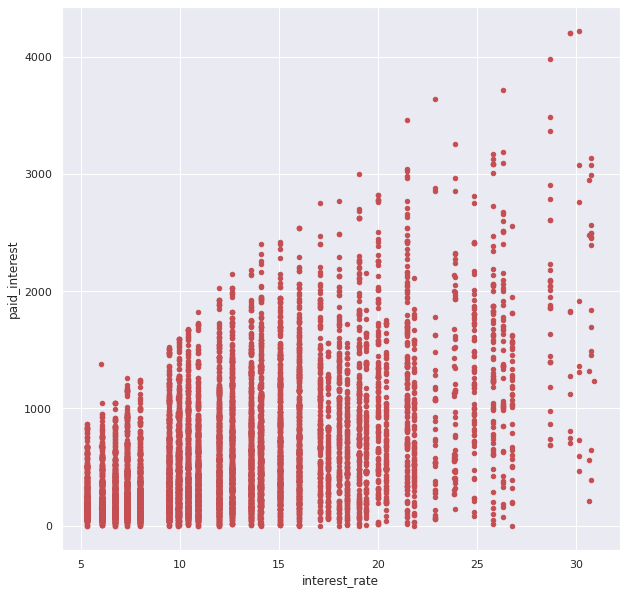

In [92]:
df.plot(x='interest_rate',y='paid_interest',kind='scatter',color='R', figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6deba84710>,
      dtype=object)

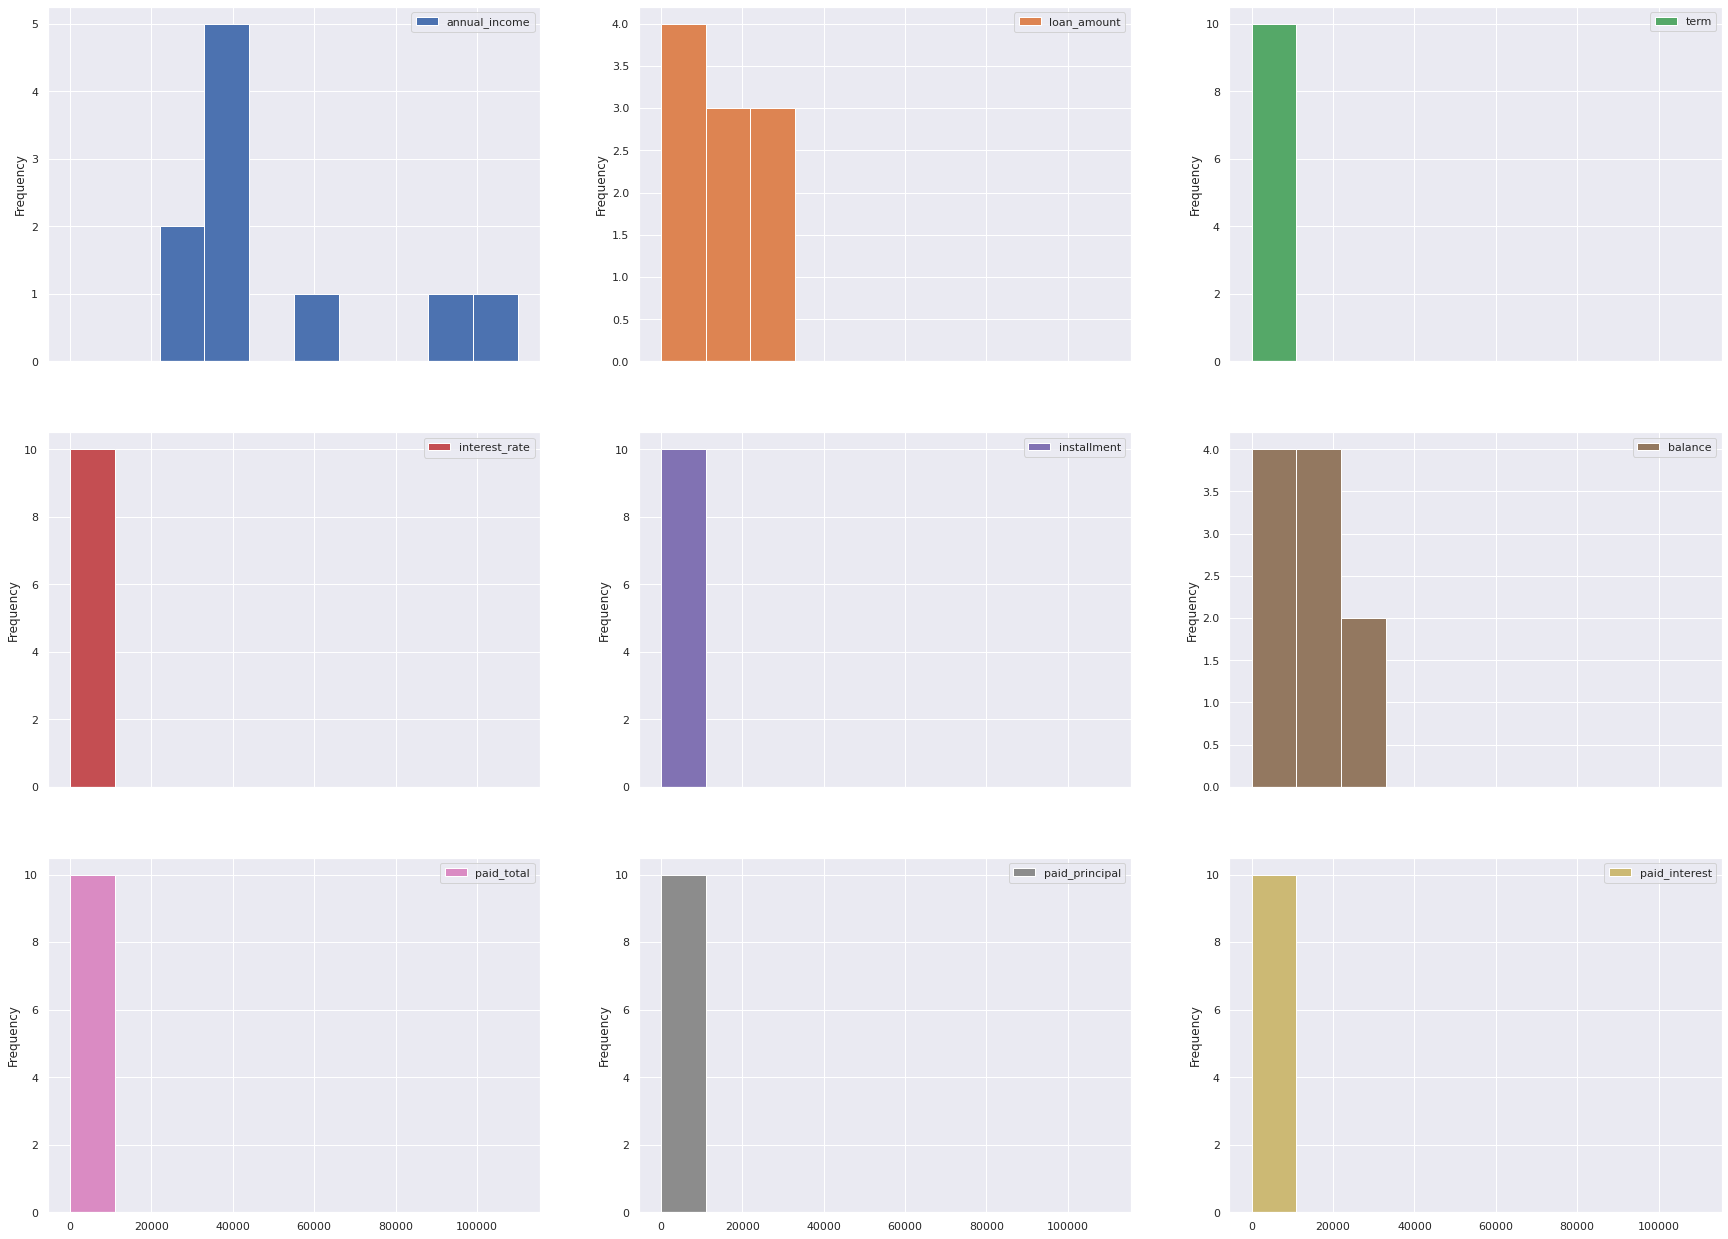

In [90]:
df[:10].plot(kind = 'hist',subplots=True, layout = (4,3), figsize=(30,30))

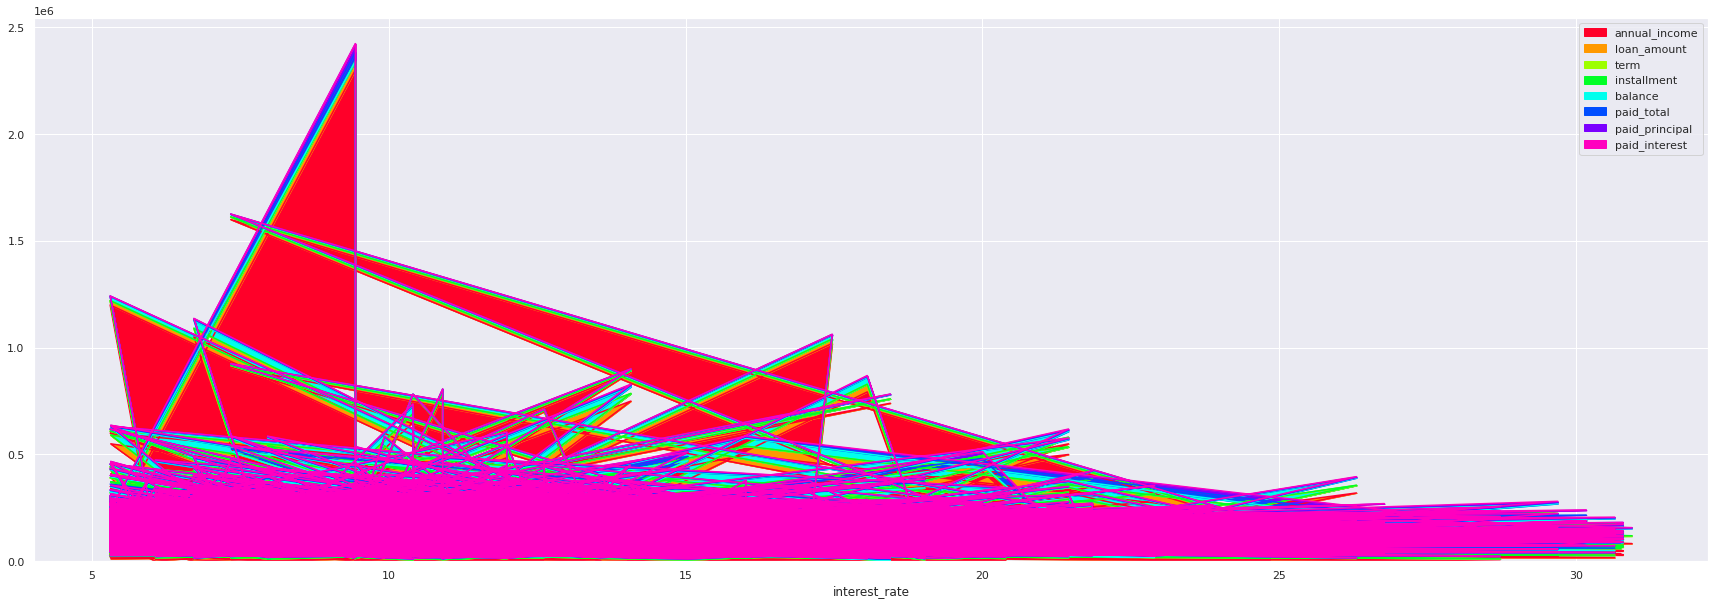

In [98]:
df.plot('interest_rate',["annual_income",	"loan_amount",	"term",	"installment",	"balance",	"paid_total",	"paid_principal",	"paid_interest"],kind = 'area',
        colormap='gist_rainbow', figsize=(30,10))

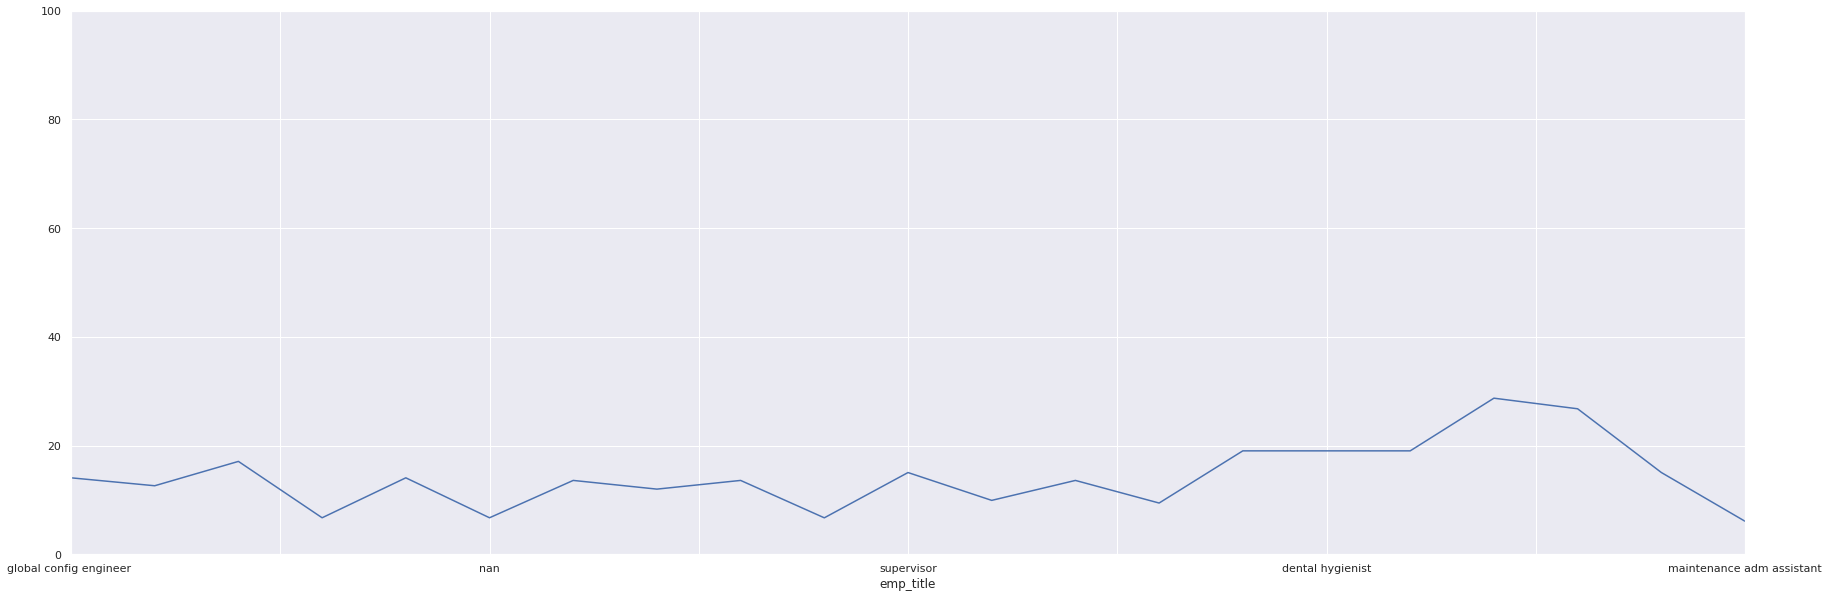

In [102]:
df['interest_rate'].plot(kind='line',xlim=(0,20),ylim=(0,100), figsize=(30,10))

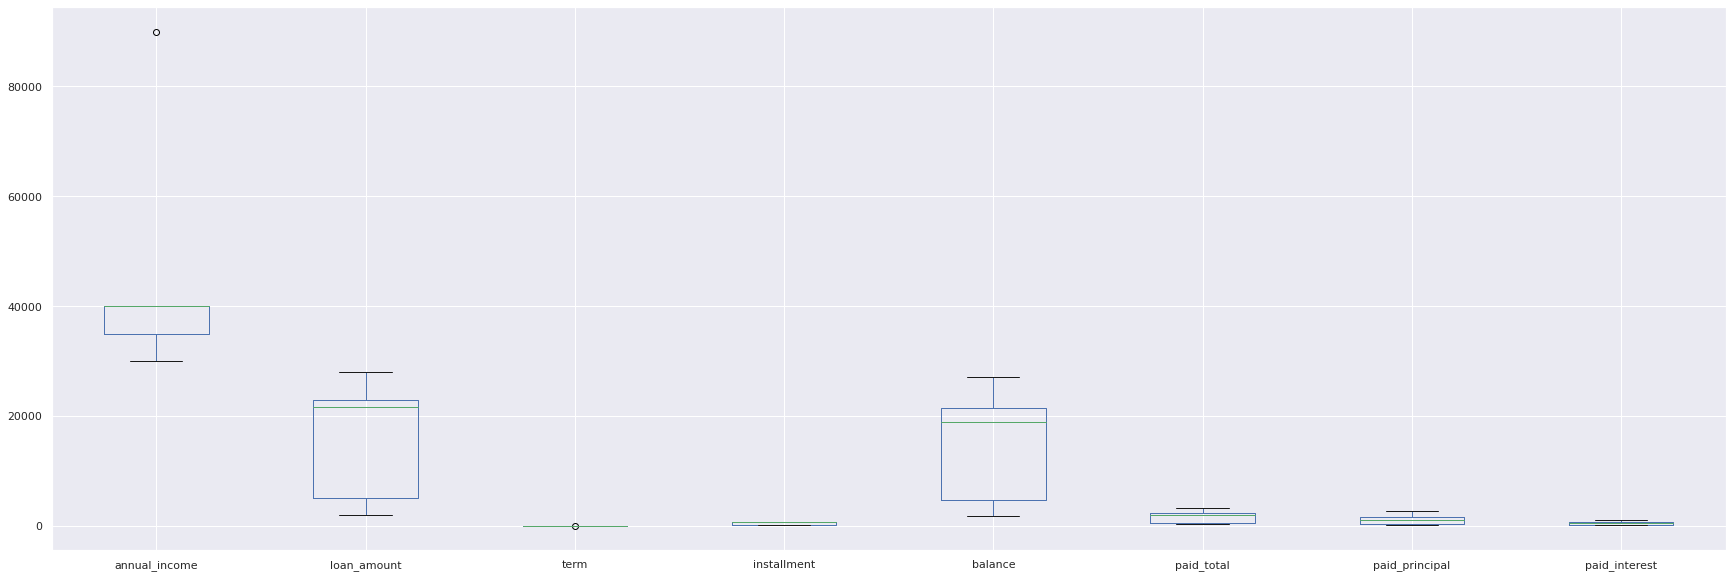

In [101]:
df[:5].plot(x='interest_rate',kind='box', figsize=(30,10))

# Method 1 for Predictions of Interest Rate

In [64]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.15)
print(len(train), len(test))

8500 1500


In [65]:
train_predictors = train.drop(["interest_rate", "paid_interest", "term"], axis = 1)
train_target = train.drop(list(train_predictors) + ["paid_interest", "term"], axis = 1)
test_predictors = test.drop(["interest_rate", "paid_interest", "term"], axis = 1)
test_target = test.drop(list(test_predictors) + ["paid_interest", "term"], axis = 1)
print(train_predictors.head(5), train_target.head(5))

                 annual_income  loan_amount  ...  paid_total  paid_principal
emp_title                                    ...                            
NaN                    70000.0        20000  ...     3337.13         2348.36
NaN                    41280.0        25000  ...     2614.91         1658.46
president & ceo       197280.0        10000  ...     1628.79         1201.92
court reporter        115000.0        14000  ...     2367.98         1622.13
salesman              185000.0        40000  ...     2379.68         1671.20

[5 rows x 6 columns]                  interest_rate
emp_title                     
NaN                      12.62
NaN                      16.01
president & ceo          10.91
court reporter           13.59
salesman                  7.35


In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(train_predictors, train_target)
train_predictions = lr.predict(train_predictors)
(train_predictions)

array([[15.37059072],
       [13.71205458],
       [12.16272788],
       ...,
       [ 9.12634253],
       [10.88249134],
       [13.49747275]])

In [79]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_target, train_predictions)))
print(metrics.r2_score(train_target, train_predictions))
print(metrics.mean_absolute_error(train_target, train_predictions))

3.6098167011830298
0.4753049981132451
2.813036307741223


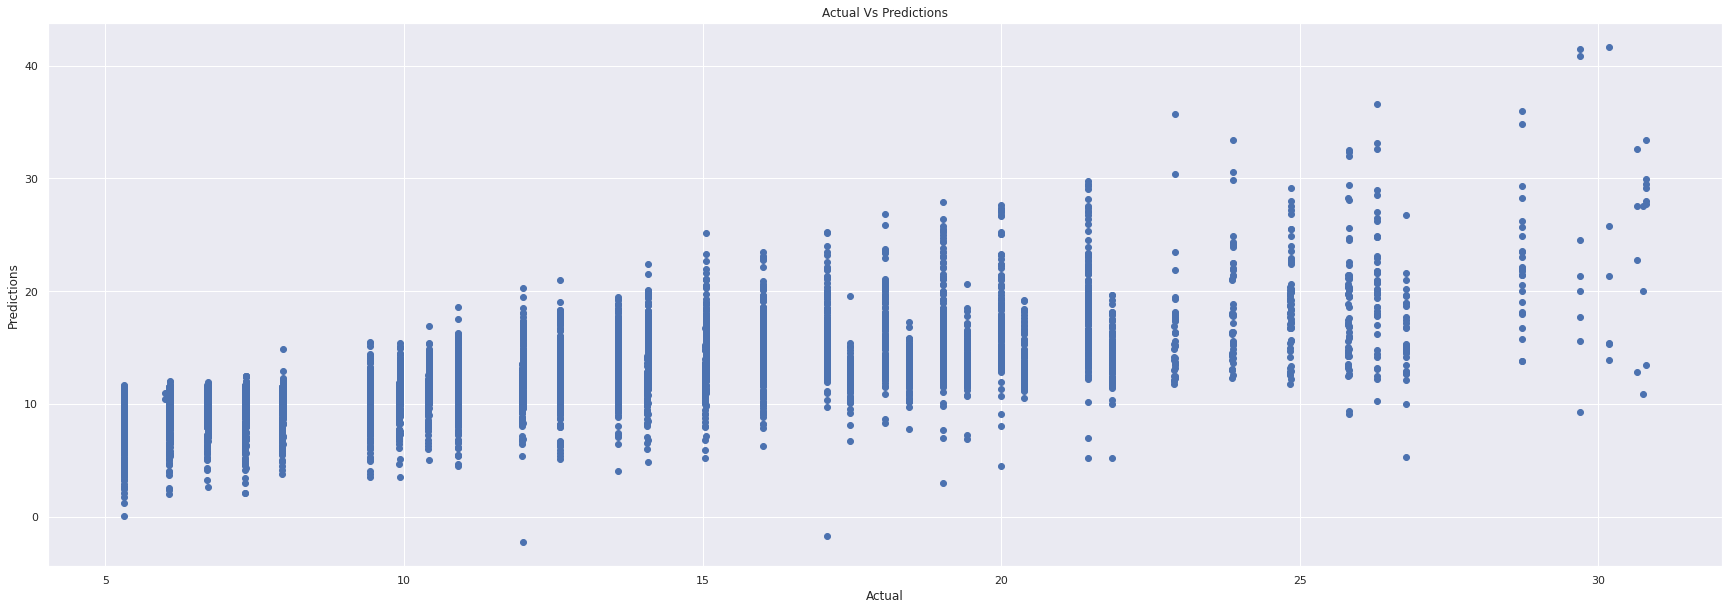

None


In [104]:
plt.figure(figsize=(30,10))
plt.scatter(train_target, train_predictions)
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.title("Actual Vs Predictions")
print(plt.show())

# Method 2 for Predictions of Interest Rate

In [78]:
X = df.drop(['interest_rate'],axis=1) 
Y = df['interest_rate']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test) #Predictions on Testing data
print((DT_predict))

[17.05395722 13.69867347  9.11414716 ...  9.25395508  7.2216095
 14.79815166]
